# Assigment-1 
Name - Rahul Tarak Balaji
Utorid - tarakbal
Student No - 1005934198

### Imports - All three questions

In [68]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean 
%matplotlib inline

### Understanding Problem 1
Speed Up Leibniz series - $$\pi = 4 \sum_{i=0}^{\infty}\frac{(-1)^i}{2i+1}$$

First, I will try to understand the problem and why the Leibniz series is slow before trying to move forward in speeding it up

In [69]:
def residual(pi):
    """
    The function finds the residual difference between the user given value of pi and the value of np.pi to check the accuracy of the value
    """
    return (np.pi - pi)
#print(residual(leibniz(10000000)))
def leibniz(n):
    """
    The above function implements the above shown Leibniz approximation of Pi for n places, this function uses same implementation shown in the tutorial
    """
    #print(type(n))
    n = int(n)
    pi = 0
    for i in range(n):
        pi += ((-1)**i)/(2*i+1)
    return 4*pi
leibnizPi = leibniz(1000) # testing the above function
print(leibnizPi,residual(leibnizPi))
print("Test of residual function after finding 10000002 value of the series-",residual(leibniz(10000002)))# testing the residual function by directly passing the value from the leibniz function


3.140592653839794 0.000999999749998981
Test of residual function after finding 10000002 value of the series- 9.999998162868451e-08


In [70]:
def iterationRequired(value:float) -> int:
    """
    The function calculates the number of interations required to find pi to the decimal accuracy specificed by the user in the value
    """
    currentResidual = None
    iteration = 0
    pi = 0
    while True:
        pi += 4*((-1)**iteration)/(2*iteration+1) #implementation of leibniz seires from tutorial
        iteration += 1
        currentResidual = residual(pi) # calling residual function defined above
        #print(currentResidual)
        if np.absolute(currentResidual) < value: # np.absolute is required as the values of the residual oscillate and can be negative
            break;
    print("The Value of pi after the number of iterations below",pi)
    return iteration
print("The number of iterations required to get a value of pi with error less than 0.01-",iterationRequired(0.01))
print("The number of iterations required to get a value of pi with error less than 0.001-",iterationRequired(0.001))
print("The number of iterations required to get a value of pi with error less than 0.0001-",iterationRequired(0.0001))
print("The number of iterations required to get a value of pi with error less than 0.0001-",iterationRequired(0.00001))
print("Real Value of Pi",np.pi)

The Value of pi after the number of iterations below 3.1315929035585537
The number of iterations required to get a value of pi with error less than 0.01- 100
The Value of pi after the number of iterations below 3.140592653839794
The number of iterations required to get a value of pi with error less than 0.001- 1000
The Value of pi after the number of iterations below 3.1414926535900345
The number of iterations required to get a value of pi with error less than 0.0001- 10000
The Value of pi after the number of iterations below 3.1416026534897203
The number of iterations required to get a value of pi with error less than 0.0001- 100001
Real Value of Pi 3.141592653589793


### Solution Problem 1
First I will try to implement the solution suggested in the problem statement of averaging partial sums and seeing the rate of convergence.

In [71]:
def partialSumConvergence(n:int) -> float:
    """
    Function returns value of pi for average of parial sums of value of the Leibniz Series
    """
    return (leibniz(n)+ leibniz(n+1))/2 # Average of Partial Sums of n and n+1

# Creating Partial Sum to 10000
partialSum = partialSumConvergence(10000) 

print(partialSum,residual(partialSum),"- Partial Sums")
# Simple Leibniz Sum to 10000
leibnizPi = leibniz(10000)

print(leibnizPi,residual(leibnizPi),"- Normal Series")
# Absolute value used as mentioned above cause residuals can be both positve and negative
print(min(np.absolute(residual(leibnizPi)),np.absolute(residual(partialSum))),"- Better Approximation") 

print(np.pi,"- Real Pi")

3.1415926485902848 4.999508362857341e-09 - Partial Sums
3.1414926535900345 9.99999997586265e-05 - Normal Series
4.999508362857341e-09 - Better Approximation
3.141592653589793 - Real Pi


The above results show that the new solution of average of partial sums is orders of magnitude faster than the previous series

Below, I will graph the convergence of both series to show the difference in the speed of convergence

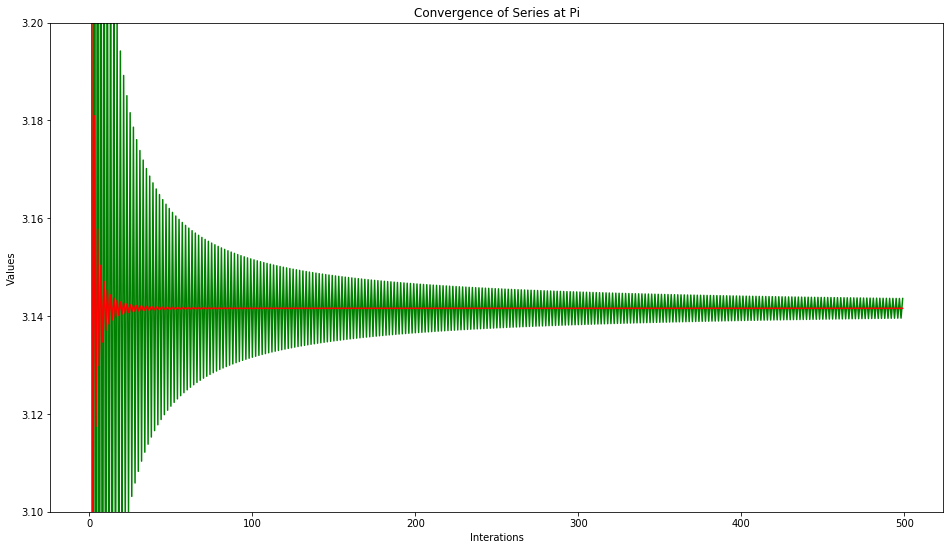

In [81]:
iterations = np.arange(1,500)
# The below numpy function vectorizes the functions such that an entire numpy array can be passed iteratively
leibnizVec = np.vectorize(leibniz) 

partialSumsVec = np.vectorize(partialSumConvergence)
# Creates the numpy arrays of the series, using both methods simple leibniz and average of partial sums
leibnizSeries = np.array(leibnizVec(iterations)) 

partialSeries = np.array(partialSumsVec(iterations))
#Plotting the Both the Series below
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(iterations,leibnizSeries,"green") # Creating plots
plt.plot(iterations,partialSeries,"red")
plt.title("Convergence of Series at Pi")
plt.xlabel("Interations")
plt.ylabel("Values")
axes = plt.gca()
axes.set_ylim([3.1,3.2]) # Setting Limit for Y-Axis
axes.set_facecolor('xkcd:white') # Setting Background colour as black
plt.show()

**The above graph is plotted only till 500 values as it represents the higher speed of the parial sum and is clear
a graph of higher value would produce a more accurate value of pi but the axis would but the rate of convergence
wouldn't be as clear**



In [73]:
residualVec = np.vectorize(residual)
iterations = np.arange(1,5000) # Create numpy array from 1 to 5000
partialSeries = np.array(partialSumsVec(iterations))
partialResiduals = np.array(np.pi-partialSeries) #Generate Residual

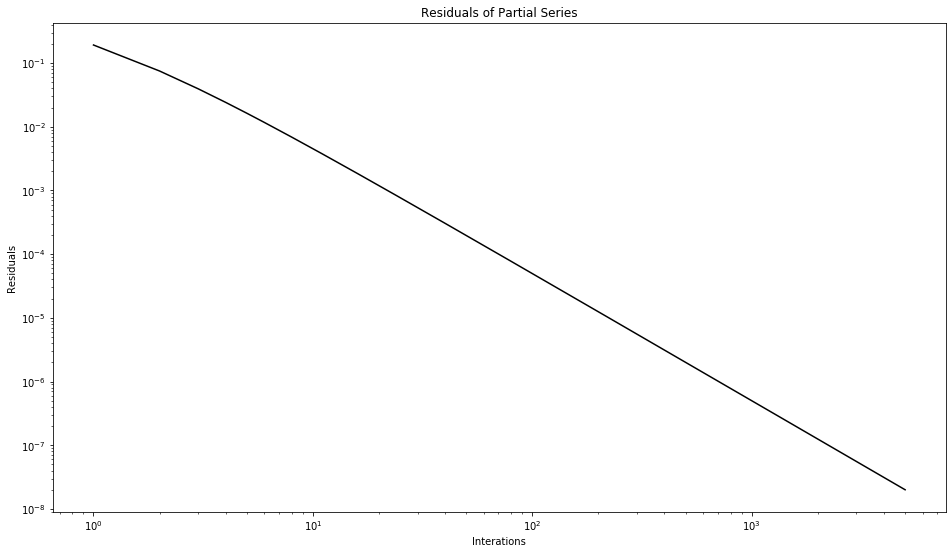

In [74]:
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.title("Residuals of Partial Series")
plt.xlabel("Interations")
plt.ylabel("Residuals")
axes = plt.gca()
# LOG-LOG Plot of Iterations vs |Residuals|
plt.loglog(iterations,np.absolute(partialResiduals),"black")
plt.show()

The above graoh has a linear relation between |reisduals| vs Number of iterations in a LOG-LOG plot. Hence we can use regression and find the equation of the line.

In [76]:
# Using scipy's statistics linear regression function to find a linear function
slope,intercept,r_value,p_value,std_err = stats.linregress(np.log10(iterations),np.log10(np.absolute(partialResiduals))) 
print("r-squared",r_value**2) # Calculate the accurarcy of the regression
print("y = ",slope,"x + (",intercept,")") # General form of straight line

r-squared 0.9999304685024348
y =  -1.9934854757793834 x + ( -0.3230932164710856 )


Solving the above equation analytically we get the value N iterations or x as for double precision or machine epsilon at 10^(-15)

$$ 2.627480674900185\times10^{10} $$

We can further speed up this series by taking the next partial sum and repeat this infinite times

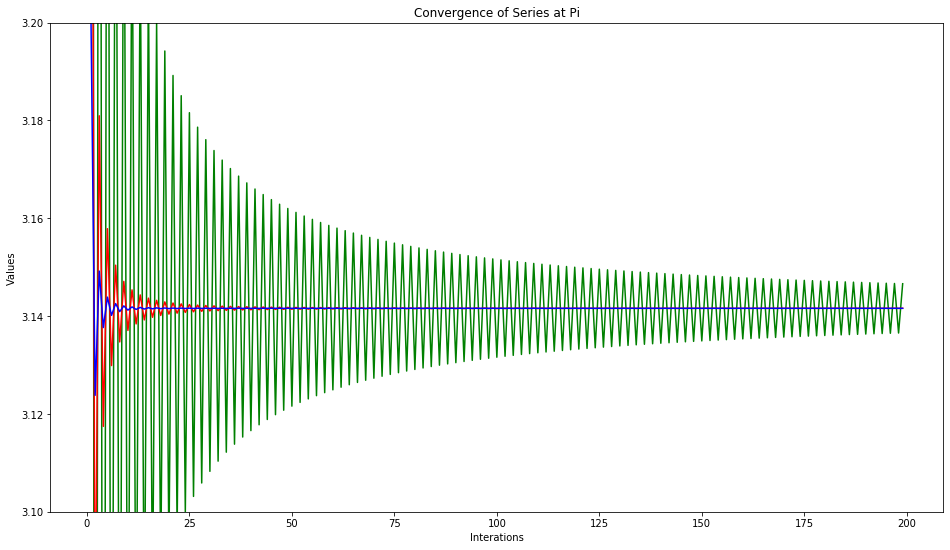

In [80]:
def secondPartialSum(n: int) -> int:
    """
    Function returns value of pi for average of SECOND parial sums of value of the Leibniz Series
    """
    return (partialSumsVec(n)+ partialSumsVec(n+1))/2 # Average of Second Partial Sums of n and n+1

secondPartialSumVec = np.vectorize(secondPartialSum)
# Series Converges faster hence lower iterations
iterations = np.arange(1,200) 
# Creates the numpy arrays of the series, using all three methods
leibnizSeries = np.array(leibnizVec(iterations)) 
partialSeries = np.array(partialSumsVec(iterations))
secondPartialSeries = np.array(secondPartialSumVec(iterations))
#Plotting the All three Series
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(iterations,leibnizSeries,"green") # Creating plots
plt.plot(iterations,partialSeries,"red")
plt.plot(iterations,secondPartialSeries,"blue")
plt.title("Convergence of Series at Pi")
plt.xlabel("Interations")
plt.ylabel("Values")
axes = plt.gca()
axes.set_ylim([3.1,3.2]) # Setting Limit for Y-Axis
axes.set_facecolor('xkcd:white') # Setting Background colour
plt.show()

This process can be repeated infinite times to increase speed of convergence.

## Understanding Problem 2

#### Given Information

Refraction at the beach - $$\frac{\sin{x_2}}{\sin{x_1}} = \frac{v_2}{v_1} $$

Given in the probem - Lifeguard (x,y) (0,-10), Shoreline y = 0, Swimmer (x,y) (20,30)

$$\frac{velocity_l}{velocity_w} = \frac{3}{1}$$

Consider WaterEntry Point (X,0)

#### Rewriting Question in terms of Functions

$$Time = \frac{distance_l}{velocity_l} + \frac{distance_w}{velocity_w}$$

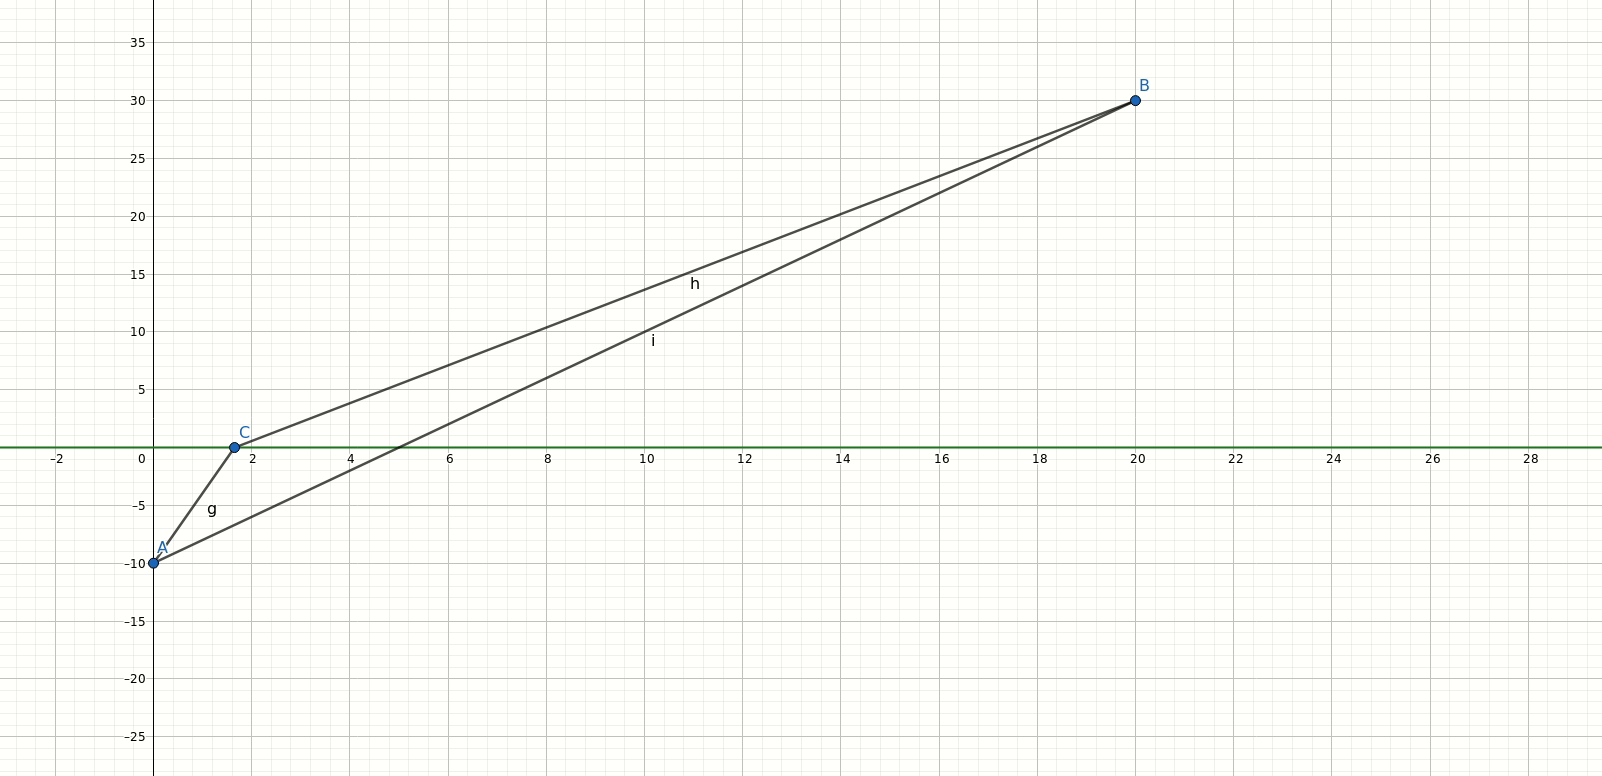

In the above animation i is shortestDistance, g is distance in sand, h is distance in water

We can also define g and h more rigioursly-
$$ g = \sqrt{x^2+10^2} \implies h = \sqrt{(20-x)^2 +(30)^2}$$

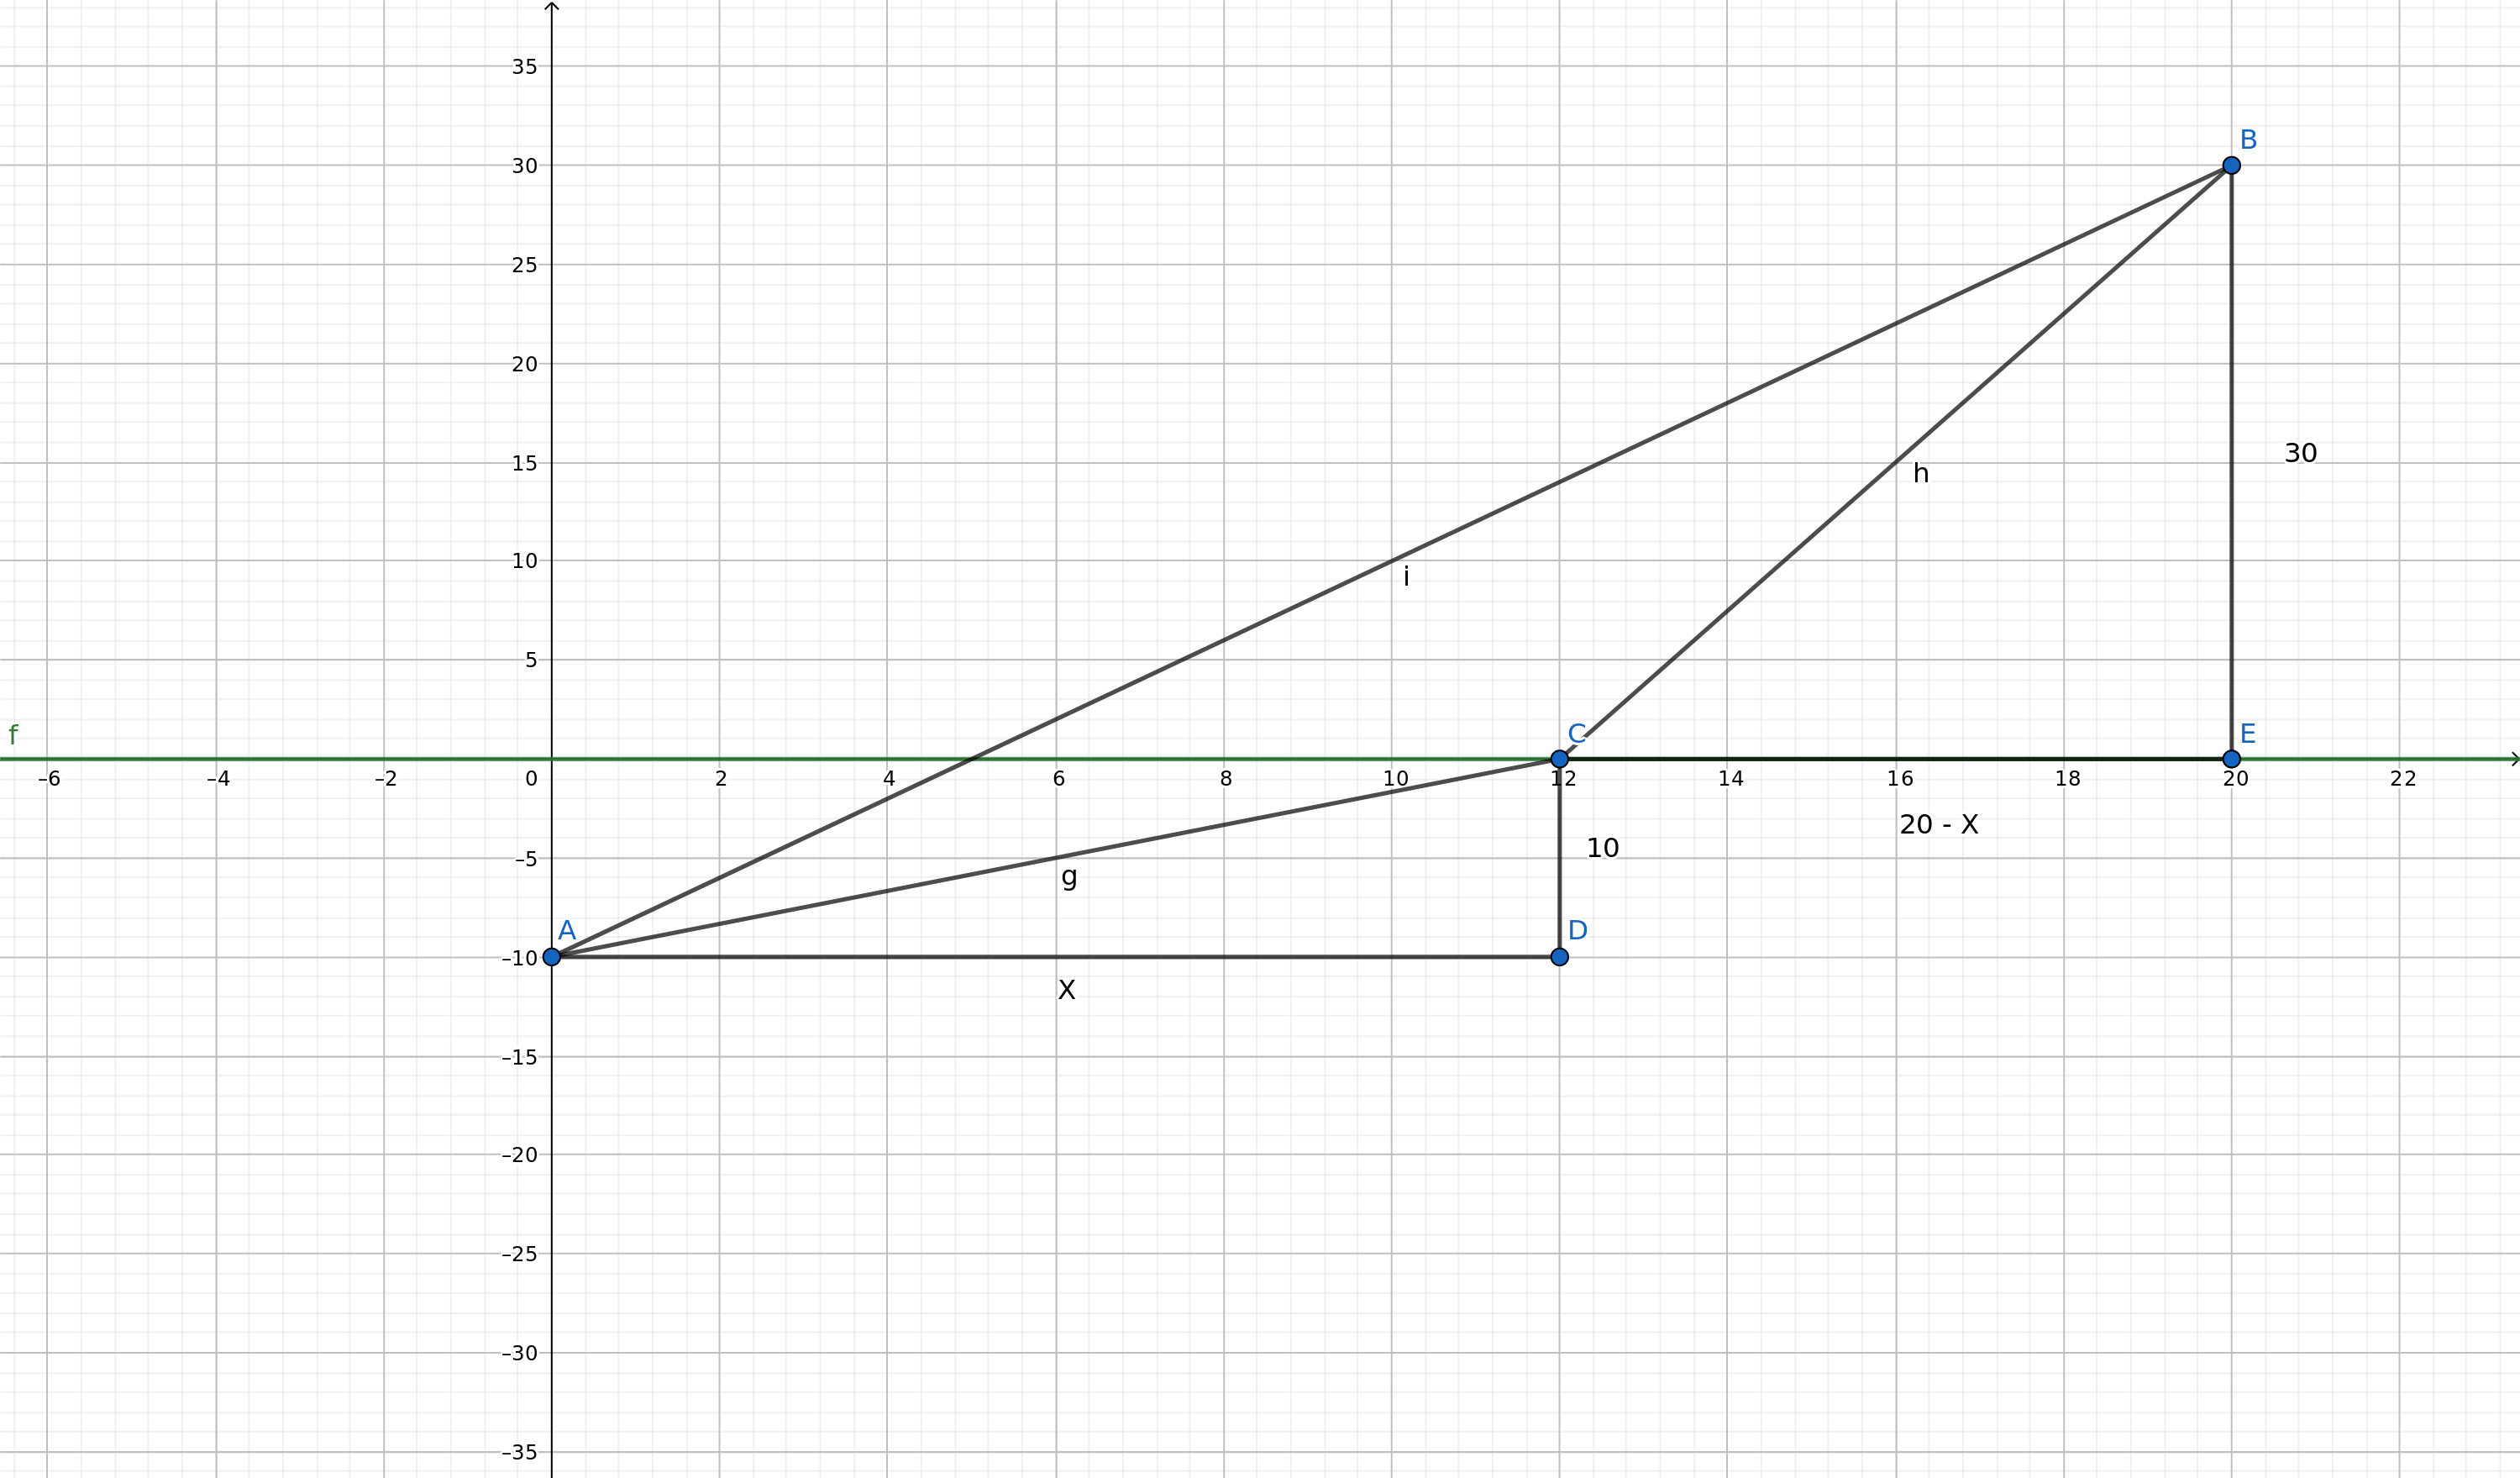
$$ Time = \frac{\sqrt{x^2+10^2}}{3} + \frac{\sqrt{(20-x)^2 +30^2}}{1}$$

## Solution Problem 2


In [63]:
"""
Using the above Time formula we could iterate through values of X from 0 to 20 to 
find such a minima without differentiating
"""
def timetaken(x):
    """
    Returns total time taken for given X Coordinate to reach Swimmer
    """
    time = (np.sqrt(x**2 + 100))/3 + np.sqrt((20-x)**2+900) # Implements the time formula above
    return time

# Creating 2000 XValues between 0-20 to get more precision
xValues = np.linspace(0,20,2000) 
# Vectorizing the above timetaken function
timetakenVec = np.vectorize(timetaken) 
# Creating all Possible Time values for the given XValues
possibleTime = np.array(timetakenVec(xValues)) 
# Finding Minima of the Numpy Array
minimaTime = np.amin(possibleTime) 

print(minimaTime,"- Minima Time Computed\n")
# Finding Index of Minima
xLocation = np.where(possibleTime==minimaTime) 
# Finding X value of Minima
minimaX = xValues[xLocation[0][0]] 

print(minimaX,"- Value of X for which Minima Time exsists\n")
# g is in reference to the graph above
minimaG = np.sqrt(minimaX**2 + 100) 
# This refers to the angle formed at ACD on the graph
thetaACD = np.arcsin(minimaX/minimaG) 
# h refers to the line on the graph above
minimaH = np.sqrt((20-minimaX)**2+900) 
# Refers the angle formed at BCD on the graph above
thetaBCD = np.arcsin(30/minimaH) 
# If you extend the normal CD further and take the angle made by line H to the normal CD you would get pi/2 - thetaBCD

print(thetaACD,(np.pi/2-thetaBCD),"- Value of Both Angles in Radians\n")
# Value of Sin(x2)/Sin(x1) for Snell's Law, Also Refractive Index if first medium is Air
refractiveIndex = np.sin((np.pi/2-thetaBCD))/np.sin(thetaACD) 

print(refractiveIndex,"- Value of Sin(x2)/Sin(x1) for Snell's Law\n")

print(np.absolute(1/3-refractiveIndex),"- Absolute Residual between Ratio of Sin and Given Velocity")

36.255150454350364 - Minima Time Computed

12.036018009004502 - Value of X for which Minima Time exsists

0.8775315872501632 0.2594811646806736 - Value of Both Angles in Radians

0.3335819062141951 - Value of Sin(x2)/Sin(x1) for Snell's Law

0.00024857288086177487 - Absolute Residual between Ratio of Sin and Given Velocity


$$\frac{\sin{0.2594811646806736}}{\sin{0.8775315872501632}} \approx \frac{1}{3} $$

**As shown above the difference between the Ratio of Given Velocity and Ratio of Sin calculated is extremely small.
Hence, it can be concluded that the above minima approximately follows Snell's law**

## Problem 3

The problem defines points o- White ball or Cue Ball is (1,1) and b- Black Ball or Target is (6,1) with a grid of 4 by 8

$$\frac{\sin{x_1}}{\sin{x_2}} = 1$$

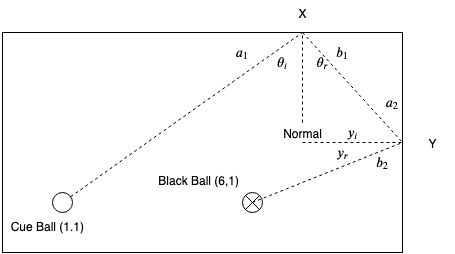
**The labeled angles are from another attempt at a solution and are irrelevant to this solution, however X and Y correspond to the same points X and Y below.**

Geometric Intuition - Slope of Reflected Line

$$ newSlope = -oldSlope $$



In [59]:
def residuals(n):
    """
    Returns the residual of yValue from accurate yValue of 1
    """
    return np.absolute(1-n)

residualsVec = np.vectorize(residuals)

def pool(start,end,mesh): # Main function for Problem 3
    """
    Returns yValues for a mesh of xValues from start to end
    """
    # Creates Mesh of xValues
    potentialXValues = np.linspace(start,end,mesh) 
    # Creates mesh of 0s for yValues
    yValues = np.zeros(mesh)
    # Creates mesh of slopes for all potentialXValues
    slope = np.tan(3/potentialXValues)
    # Creates mesh of reflected slopes
    reflectedSlopeAtX = -slope 
    # Creates mesh of c values from the equation y = mx + c at the point(X,4)
    reflectedCAtX = 4 - reflectedSlopeAtX*potentialXValues
    # Creates mesh of Ys on the line at Point x = 8 by solving y = m*8 + c
    Y = 8*reflectedSlopeAtX + reflectedCAtX
    reflectedSlopeAtY = -reflectedCAtX # Same as slope
    # Creates mesh of c values from the equation y = mx + c at the point(8,Y)
    reflectedCAtY = Y - slope*8
    # Creates mesh of yValues for the above line at Point x = 6, by solving y_2 =m_2*6 + c_2
    yValues = slope*6 + reflectedCAtY 
    # Correct Value is 1, i.e, it hits the black ball if yValue is 1.
    return yValues

print("Printing Iterations of the Pool function by changing mesh size and end points\n")
print(pool(1,7,7),"- Mesh of Size 7 from 1 to 7, to see which x values to target\n")
print(pool(5,6,10),"- Mesh of Size 10 from 5 to 6 \n")
print(pool(5,5.5,10),"- Mesh of Size 10 from 5 to 5.5 \n")
print(pool(5,5.25,10),"- Mesh of Size 10 from 5 to 5.25, (wrong mesh got worse value)\n")
print(pool(5.25,5.3,10),"- Mesh of Size 10 from 5.25 to 5.3\n")
print(pool(5.29,5.3,10),"- Mesh of Size 10 from 5.29 to 5.3\n")
print(residualsVec(pool(5.29,5.3,10)),"- Residuals of Previous Mesh of Size 10 from 2.9 to 5.3\n")
# The residuals towards 5.3 are greater than towards 2.9 hence reducing the mesh
print(pool(5.29,5.2925,20),"- Mesh of Size 20 from 5.29 to 5.2925\n")
# Creating mesh of residuals from 5.29 to 5.2925 of size 20
residualMesh = residualsVec(pool(5.29,5.2925,20))
print(residualMesh,"-Residuals of Previous Mesh of Size 20 from 5.29 to 5.2925\n")
print((residualMesh < 0.005).all()," - Evaluates if three digit accuracy of X has been achieved,\n By testing if all the residuals in the mesh are less than 0.005")

Printing Iterations of the Pool function by changing mesh size and end points

[   5.28291889 -108.81135958   -6.90185407   -1.58957876    0.57931596
    1.81479004    2.62932068] - Mesh of Size 7 from 1 to 7, to see which x values to target

[0.57931596 0.74812274 0.90739005 1.05795752 1.20056524 1.33586834
 1.46444919 1.58682742 1.70346834 1.81479004] - Mesh of Size 10 from 5 to 6 

[0.57931596 0.66496862 0.74812274 0.82889382 0.90739005 0.98371286
 1.05795752 1.13021356 1.20056524 1.26909189] - Mesh of Size 10 from 5 to 5.5 

[0.57931596 0.62246212 0.66496862 0.7068506  0.74812274 0.78879924
 0.82889382 0.8684198  0.90739005 0.94581704] - Mesh of Size 10 from 5 to 5.25, (wrong mesh got worse value)

[0.94581704 0.95343831 0.96103844 0.96861751 0.97617562 0.98371286
 0.99122932 0.9987251  1.00620028 1.01365497] - Mesh of Size 10 from 5.25 to 5.3

[1.00022178 1.00171764 1.00321268 1.00470689 1.00620028 1.00769286
 1.00918461 1.01067555 1.01216567 1.01365497] - Mesh of Size 10 from 5.2

The above program prints out iterations of the pool function to show the narrowing of the mesh till three digit accuracy is achieved. The approximate X for the solution is

$$ X \approx 5.29 $$

## Problem 4

`The PDP-11 and Z3 computers are machines from completely different times so it would be hard to directly compare them, however, we can at a high level see the differences. Z3 computer was built in 1941 for the war, it had 2600 relays and operated on 22-bit words. The clock frequency of the computer was 4-5Hz and the code was stored on punched film. This computer had no conditional branching, i,e, it cannot handle if statements. Whereas, the PDP-11 in comparison is relatively modern, it was offered with the UNIX operating system which is the base of all modern operating systems. This system also has far more respectable specifications, with 128k Ram, 2MB Hard Disk and an arithmetic speed of 30kFLOPS. The PDP-11, offered a variety of digital programming languages while the Z3 had to be analogy programmed on punched film`

## Bibliography

* fast., Pi, and Martijn Courteaux. "Pi Series That Converges Arbitrarily Fast.". Mathematics Stack Exchange, 2019, https://math.stackexchange.com/questions/2549979/pi-series-that-converges-arbitrarily-fast.